# Assignment #2 - Machine Learning Model Pipeline

I am using the Music & Mental Health Survey Results from kaggle,
found here: https://www.kaggle.com/datasets/catherinerasgaitis/mxmh-survey-results/data.

Music therapy, or MT, is the use of music to improve an individual's stress, mood, and overall mental health. MT is also recognized as an evidence-based practice, using music as a catalyst for "happy" hormones such as oxytocin.

However, MT employs a wide range of different genres, varying from one organization to the next.

The MxMH dataset aims to identify what, if any, correlations exist between an individual's music taste and their self-reported mental health.

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.cluster import KMeans
from collections import Counter
from sklearn.model_selection import train_test_split

import warnings

warnings.filterwarnings('ignore')
sns.set(color_codes = True)
sns.color_palette("viridis", as_cmap=True)
sns.set_palette("viridis")

# Load the Dataset

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/mxmh_survey_results.csv"
df = pd.read_csv(path)
df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


# Data Set Size

In [ ]:
df.shape

(736, 33)

In this dataset there are 736 unique values



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,735.0,2.520680e+01,1.205497e+01,10.0,18.0,21.0,28.0,89.0
Hours per day,736.0,3.572758e+00,3.028199e+00,0.0,2.0,3.0,5.0,24.0
BPM,629.0,1.589948e+06,3.987261e+07,0.0,100.0,120.0,144.0,999999999.0
Anxiety,736.0,5.837636e+00,2.793054e+00,0.0,4.0,6.0,8.0,10.0
Depression,736.0,4.796196e+00,3.028870e+00,0.0,2.0,5.0,7.0,10.0
Insomnia,736.0,3.738451e+00,3.088689e+00,0.0,1.0,3.0,6.0,10.0
OCD,736.0,2.637228e+00,2.842017e+00,0.0,0.0,2.0,5.0,10.0


In [ ]:
df.describe(exclude='number').T

,count,unique,top,freq
Timestamp,736,735,8/28/2022 16:15:08,2
Primary streaming service,735,6,Spotify,458
While working,733,2,Yes,579
Instrumentalist,732,2,No,497
Composer,735,2,No,609
Fav genre,736,16,Rock,188
Exploratory,736,2,Yes,525
Foreign languages,732,2,Yes,404
Frequency [Classical],736,4,Rarely,259
Frequency [Country],736,4,Never,343


# Cleaning

Removing outliers

In [ ]:
age_index = df[(df['Age'] > 70)].index
df = df.drop(age_index, axis=0)

In [ ]:
hpd_index = df[df['Hours per day'] >= 15].index
df = df.drop(hpd_index, axis=0)

In [ ]:
data_index = df[df['BPM'] > 200].index
df = df.drop(data_index, axis=0)


In [ ]:
data_index = df[df['BPM'] < 50].index
df = df.drop(data_index, axis=0)

Removing coulmns that are not needed

In [ ]:
df.drop(['Timestamp', 'Permissions'], axis=1, inplace=True)

Round all values

In [ ]:
df = df.round()

Check for null values

In [ ]:
df.isnull().sum()

Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             105
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                           0
Depression                  

This will show us which features have unknown or missing values.

Drop null values

In [ ]:
df.dropna(subset=['BPM', 'Age', 'Primary streaming service',
                  'While working', 'Instrumentalist', 'Composer',
                  'Foreign languages', 'Music effects' ], inplace=True)

In [ ]:
df.isna().sum()

Age                             0
Primary streaming service       0
Hours per day                   0
While working                   0
Instrumentalist                 0
Composer                        0
Fav genre                       0
Exploratory                     0
Foreign languages               0
BPM                             0
Frequency [Classical]           0
Frequency [Country]             0
Frequency [EDM]                 0
Frequency [Folk]                0
Frequency [Gospel]              0
Frequency [Hip hop]             0
Frequency [Jazz]                0
Frequency [K pop]               0
Frequency [Latin]               0
Frequency [Lofi]                0
Frequency [Metal]               0
Frequency [Pop]                 0
Frequency [R&B]                 0
Frequency [Rap]                 0
Frequency [Rock]                0
Frequency [Video game music]    0
Anxiety                         0
Depression                      0
Insomnia                        0
OCD           

# Recheck size

In [ ]:
df.shape

(590, 31)

# Initial Analysis

In [ ]:
# Display the first few rows of the DataFrame
print("\nHead of the DataFrame:")
print(df.head())

# Display summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Display info
print("\nDataFrame Info:")
print(df.info())

# Additional statistics
print("\nAdditional Statistics:")
print("Mean:\n", df.mean(numeric_only=True), "\n")
print("Median:\n", df.median(numeric_only=True), "\n")
print("Mode:\n", df.mode(numeric_only=True).iloc[0], "\n")
print("Standard Deviation:\n", df.std(numeric_only=True), "\n")
print("Variance:\n", df.var(numeric_only=True), "\n")
print("Skewness:\n", df.skew(numeric_only=True), "\n")
print("Kurtosis:\n", df.kurtosis(numeric_only=True), "\n")


Head of the DataFrame:
    Age Primary streaming service  Hours per day While working  \
2  18.0                   Spotify            4.0            No   
3  61.0             YouTube Music            2.0           Yes   
4  18.0                   Spotify            4.0           Yes   
5  18.0                   Spotify            5.0           Yes   
6  18.0             YouTube Music            3.0           Yes   

  Instrumentalist Composer         Fav genre Exploratory Foreign languages  \
2              No       No  Video game music          No               Yes   
3              No      Yes              Jazz         Yes               Yes   
4              No       No               R&B         Yes                No   
5             Yes      Yes              Jazz         Yes               Yes   
6             Yes       No  Video game music         Yes               Yes   

     BPM  ...  Frequency [Pop]  Frequency [R&B]  Frequency [Rap]  \
2  132.0  ...           Rarely            

Show the Plot Distributions For Numerical Features

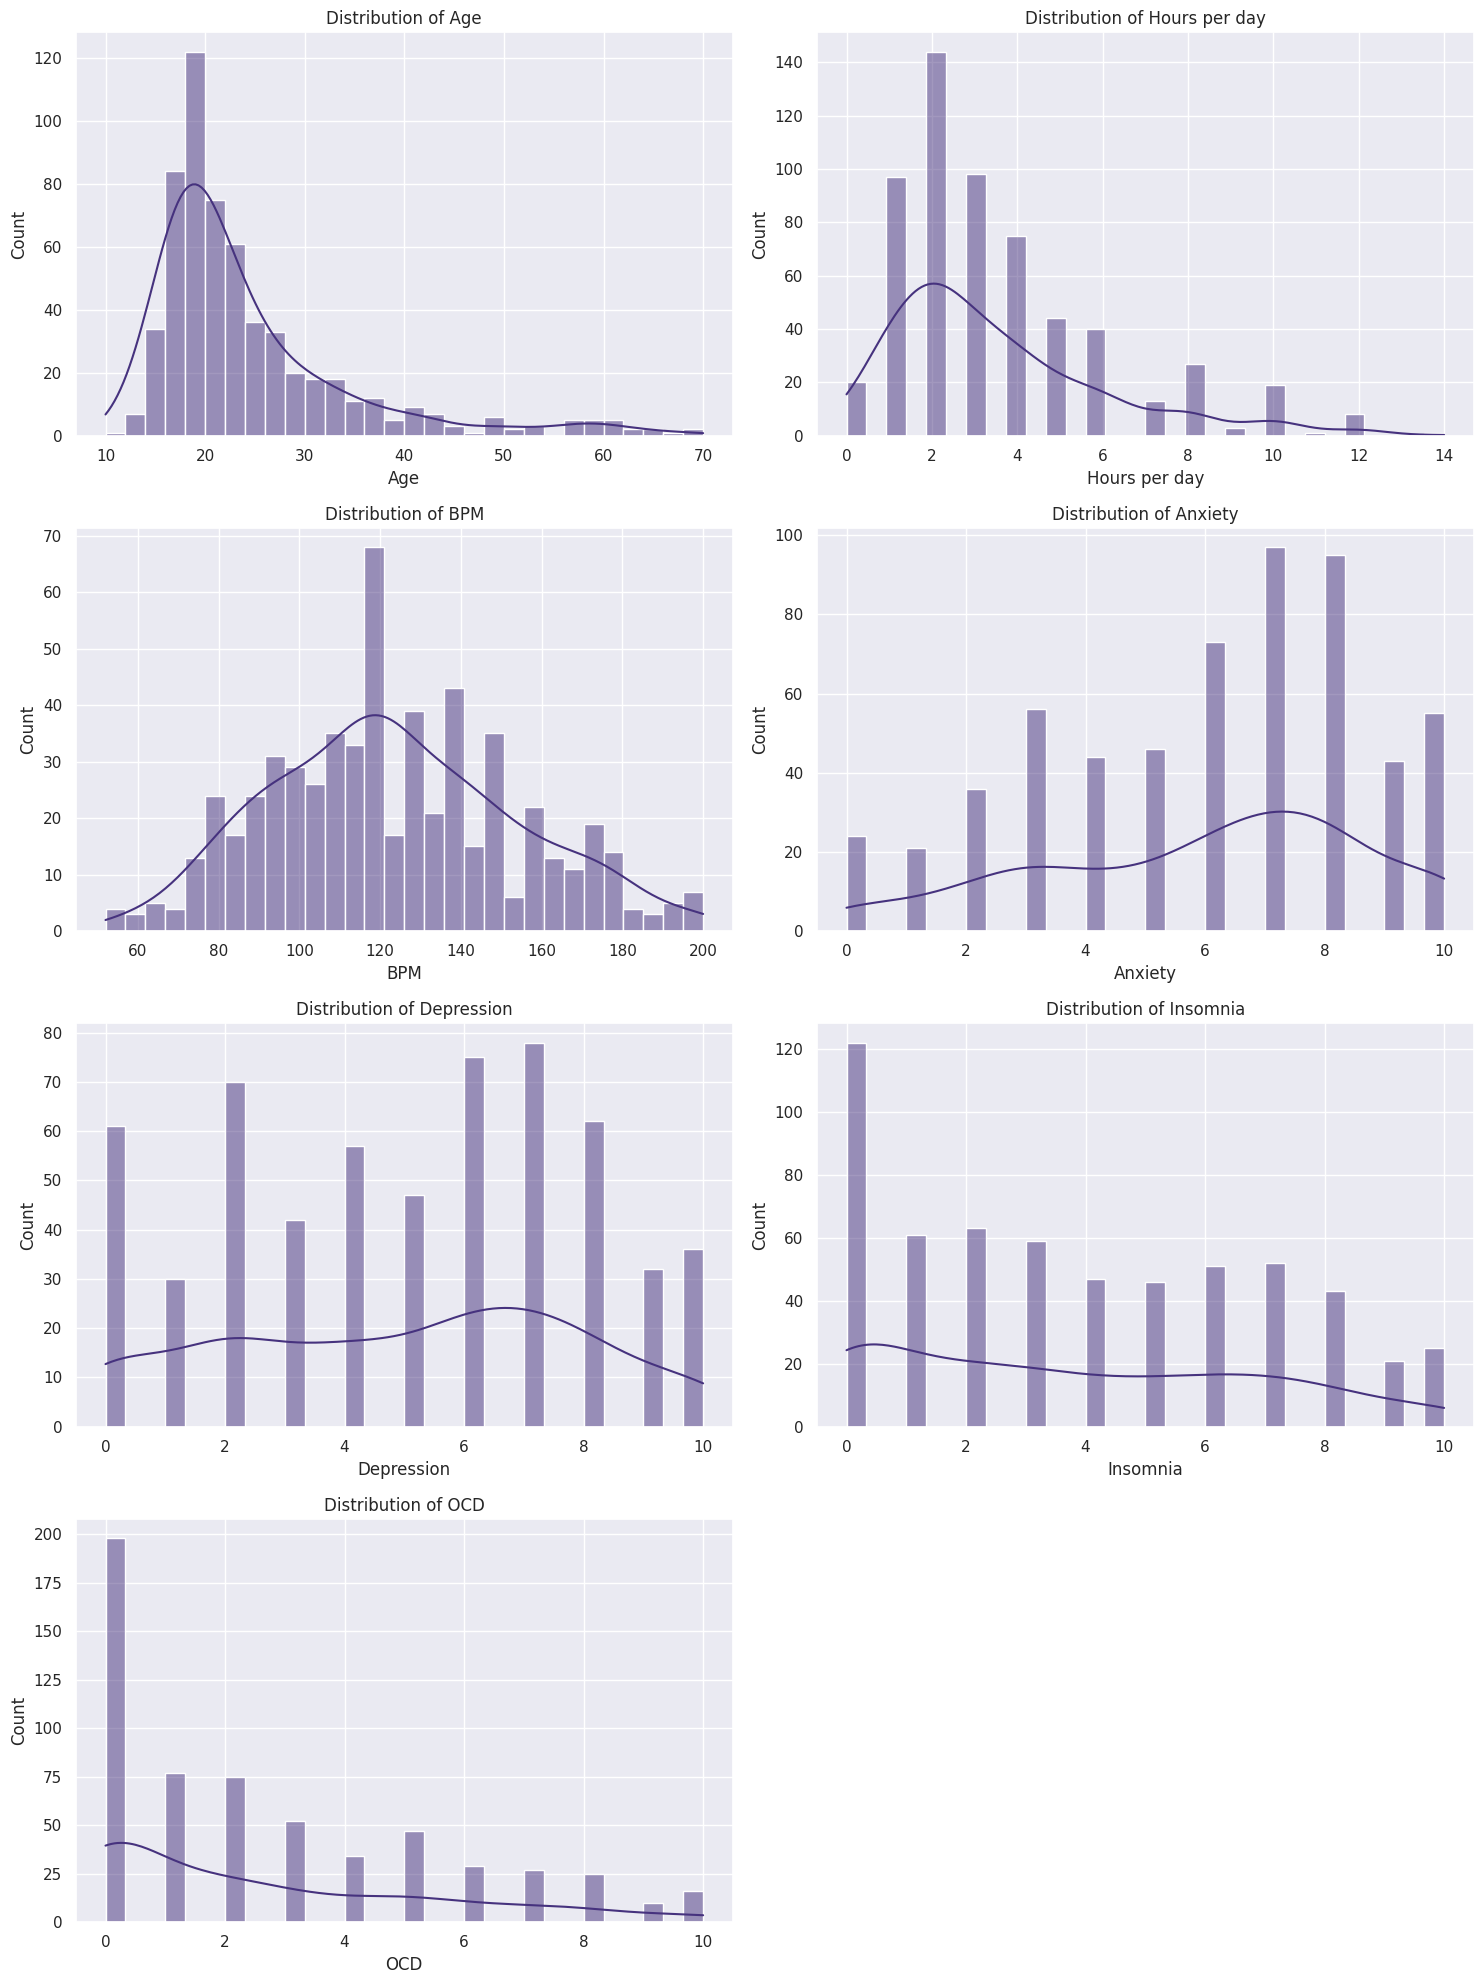

In [ ]:
numerical_columns = ['Age', 'Hours per day', 'BPM', 'Anxiety', 'Depression', 'Insomnia', 'OCD', ]



plt.figure(figsize=(15, 20))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 2, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

Show the Plot Counts for Categorical Features

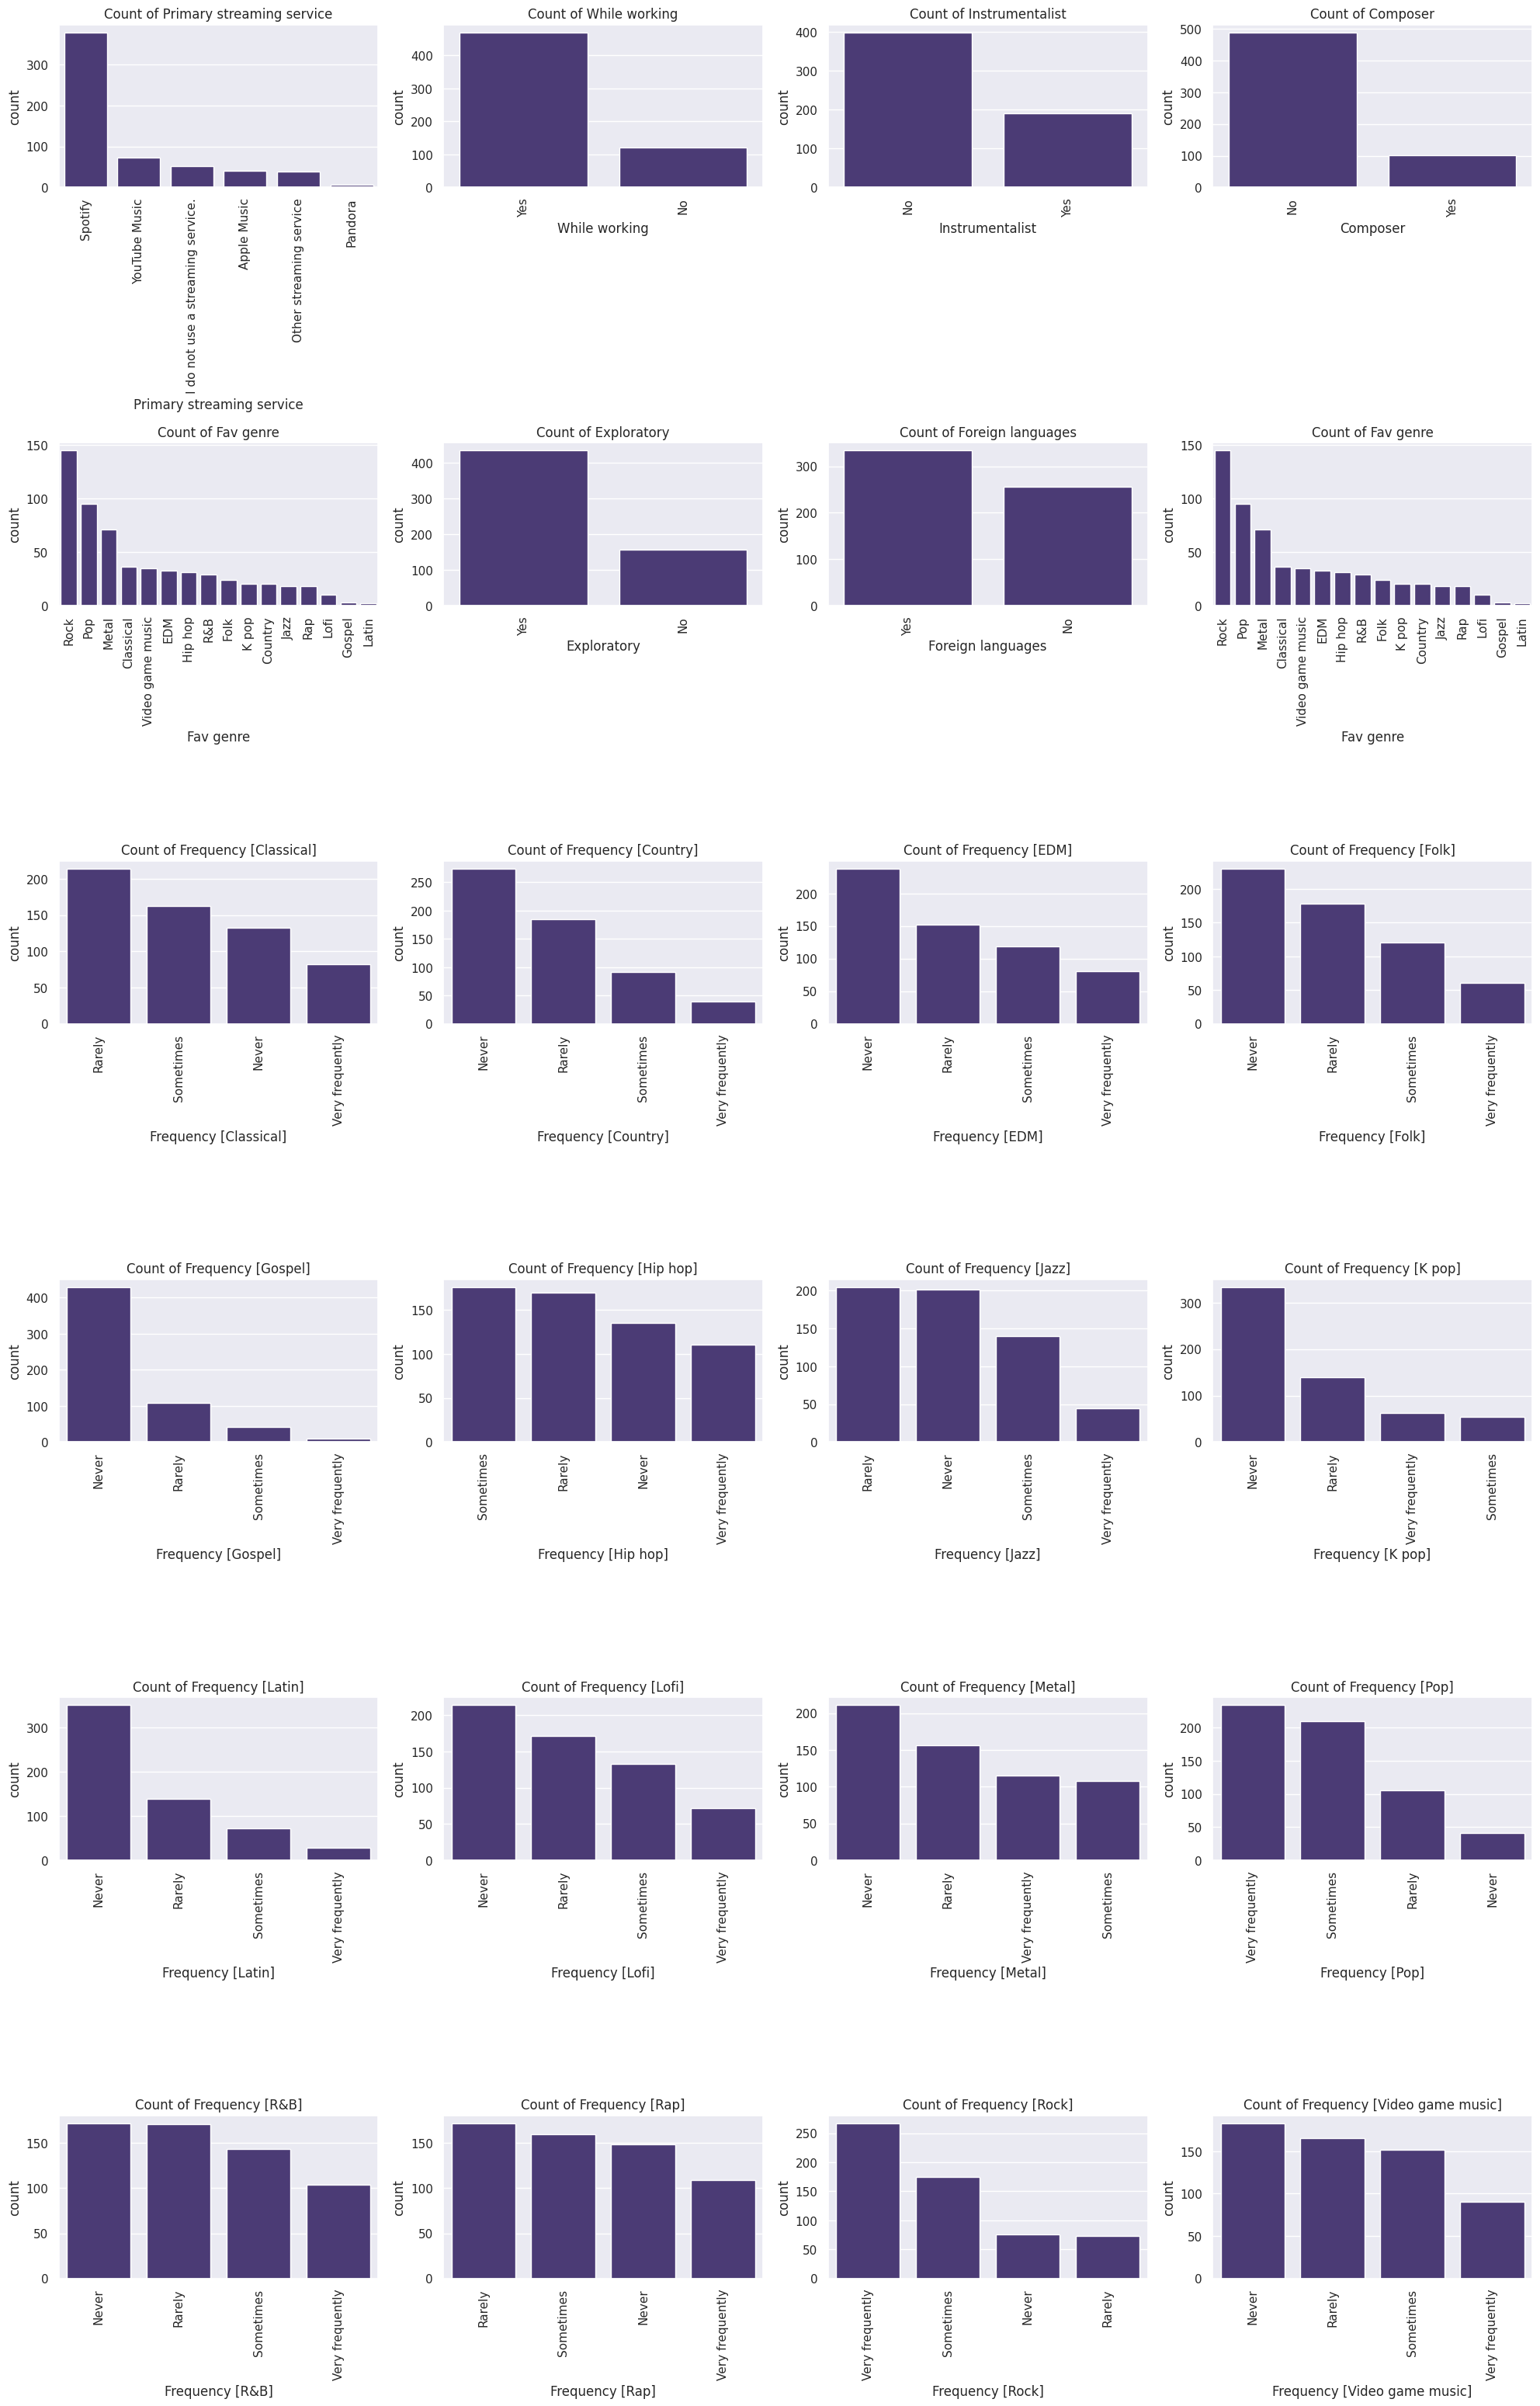

In [ ]:
categorical_columns = ['Primary streaming service', 'While working', 'Instrumentalist',
                       'Composer', 'Fav genre', 'Exploratory', 'Foreign languages',
                       'Fav genre', 'Frequency [Classical]', 'Frequency [Country]',
                       'Frequency [EDM]', 'Frequency [Folk]', 'Frequency [Gospel]',
                       'Frequency [Hip hop]', 'Frequency [Jazz]', 'Frequency [K pop]',
                       'Frequency [Latin]', 'Frequency [Lofi]', 'Frequency [Metal]',
                       'Frequency [Pop]', 'Frequency [R&B]', 'Frequency [Rap]',
                       'Frequency [Rock]', 'Frequency [Video game music]']

plt.figure(figsize=(20, 35))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(7, 4, i)
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Filter DataFrame by Numerical Columns and Plot the Heatmap

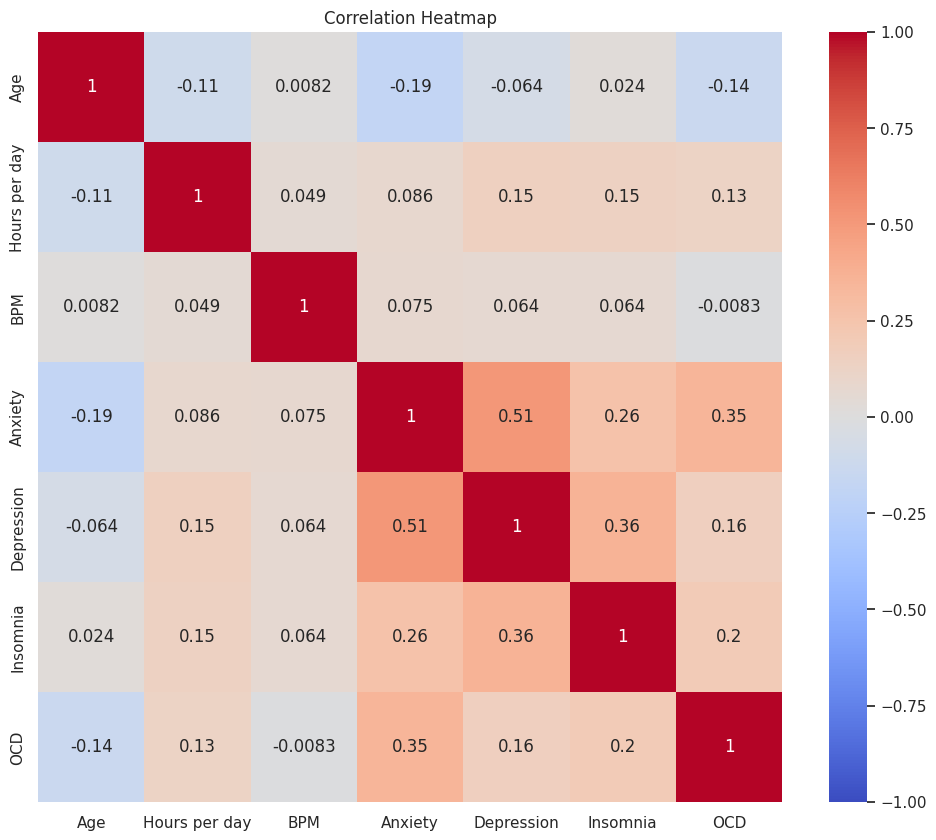

In [ ]:
numeric_df = df[numerical_columns]

plt.figure(figsize=(12, 10))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

# Music Analysis

<Axes: xlabel='Age', ylabel='Count'>

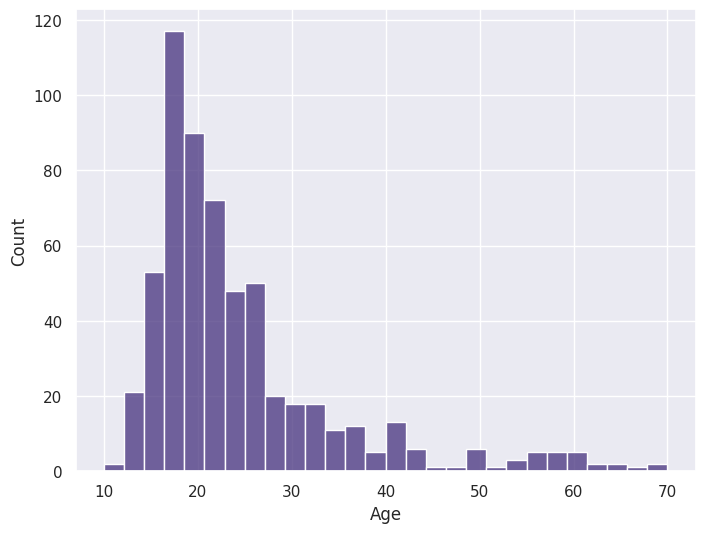

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(df['Age'])

Most common ages of people under 50

In [ ]:
df['Age'].value_counts().loc[lambda x : x>50]

Age
18.0    67
19.0    55
Name: count, dtype: int64

Age of the oldest person

In [ ]:
df['Age'].max()

70.0

Streaming Services by popularity

Text(0, 0.5, '')

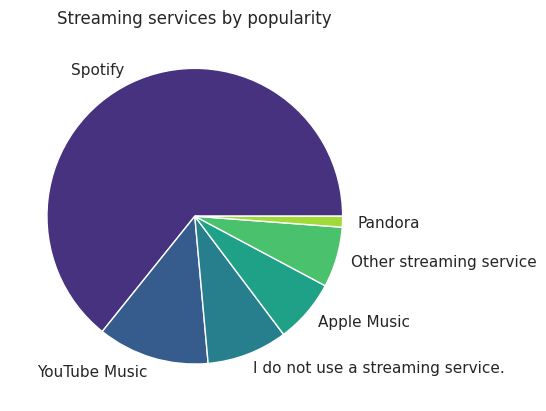

In [ ]:
services = df['Primary streaming service'].value_counts()
services.plot(kind='pie')

plt.title('Streaming services by popularity')
plt.ylabel("")

Most common streaming service was Spotify and the Leasst common was Pandora.

In [ ]:
df['Primary streaming service'].value_counts(normalize=True)

Primary streaming service
Spotify                              0.642373
YouTube Music                        0.122034
I do not use a streaming service.    0.088136
Apple Music                          0.069492
Other streaming service              0.066102
Pandora                              0.011864
Name: proportion, dtype: float64

Streaming Services by Age

Text(0.5, 1.0, 'Streaming services by Age')

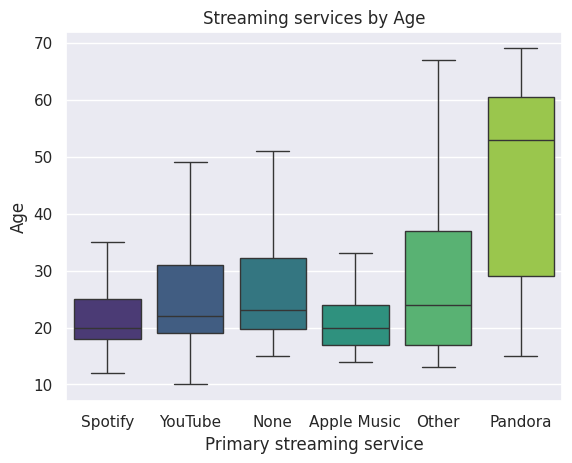

In [ ]:
df.replace(['Other streaming service', 'I do not use a streaming service.', 'YouTube Music'],
                       ['Other', 'None', 'YouTube'], inplace=True)

bplot = sns.boxplot(data=df, x="Primary streaming service", y = "Age",
            showfliers = False, palette = "viridis")

plt.title('Streaming services by Age')

Most common age per streaming service

In [ ]:
s_df = df.groupby(['Primary streaming service'])
s_ages = []
s_ages.append(s_df['Age'].median())

s_ages

[Primary streaming service
 Apple Music    20.0
 None           23.0
 Other          24.0
 Pandora        53.0
 Spotify        20.0
 YouTube        22.0
 Name: Age, dtype: float64]

Musical Background

Text(0, 0.5, 'Composer       ')

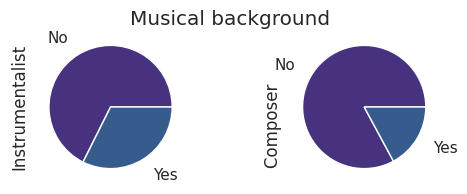

In [ ]:
fig = plt.figure(figsize=(6,2))

plt.suptitle("Musical background")

ax = fig.add_subplot(121)

inst = df['Instrumentalist'].value_counts()
inst.plot(kind='pie', labeldistance = 1.3)
plt.ylabel('Instrumentalist')

ax = fig.add_subplot(122)

comp = df['Composer'].value_counts()
comp.plot(kind='pie', labeldistance = 1.3)
plt.ylabel('Composer       ')

In [ ]:
df.replace(['No', 'Yes'],
                       [0, 1], inplace=True)

Hours per day

<Axes: xlabel='Hours per day', ylabel='Count'>

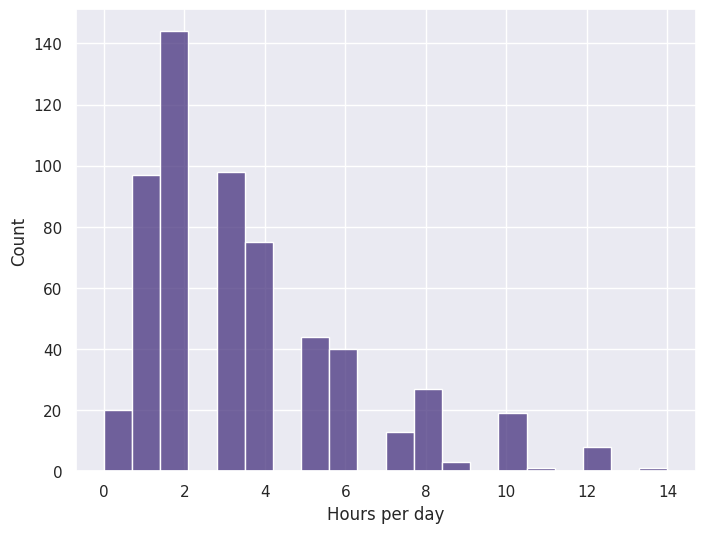

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(df['Hours per day'], palette = "viridis")

BPM

<Axes: xlabel='BPM', ylabel='Count'>

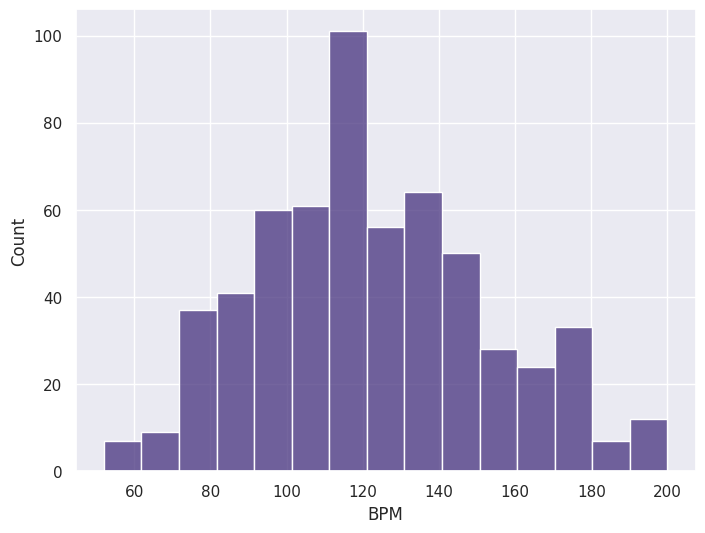

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(df['BPM'], palette = "viridis")

Favorite genre and age

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Video game music'),
  Text(1, 0, 'Jazz'),
  Text(2, 0, 'R&B'),
  Text(3, 0, 'K pop'),
  Text(4, 0, 'Rock'),
  Text(5, 0, 'EDM'),
  Text(6, 0, 'Country'),
  Text(7, 0, 'Hip hop'),
  Text(8, 0, 'Rap'),
  Text(9, 0, 'Pop'),
  Text(10, 0, 'Classical'),
  Text(11, 0, 'Metal'),
  Text(12, 0, 'Folk'),
  Text(13, 0, 'Lofi'),
  Text(14, 0, 'Gospel'),
  Text(15, 0, 'Latin')])

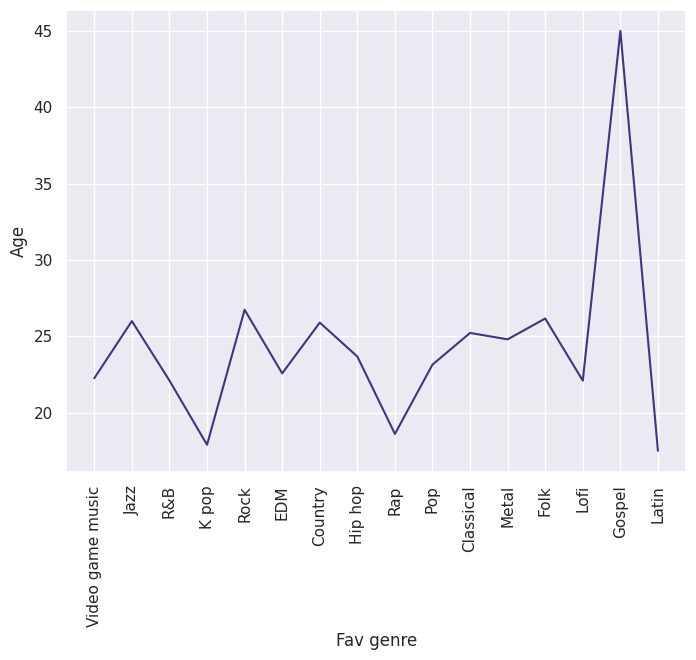

In [ ]:
plt.figure(figsize=(8,6))
sns.lineplot(x=df['Fav genre'], y=df['Age'], ci=None)
plt.xticks(rotation=90)

Favorite Genre and number of hours listened per day

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Video game music'),
  Text(1, 0, 'Jazz'),
  Text(2, 0, 'R&B'),
  Text(3, 0, 'K pop'),
  Text(4, 0, 'Rock'),
  Text(5, 0, 'EDM'),
  Text(6, 0, 'Country'),
  Text(7, 0, 'Hip hop'),
  Text(8, 0, 'Rap'),
  Text(9, 0, 'Pop'),
  Text(10, 0, 'Classical'),
  Text(11, 0, 'Metal'),
  Text(12, 0, 'Folk'),
  Text(13, 0, 'Lofi'),
  Text(14, 0, 'Gospel'),
  Text(15, 0, 'Latin')])

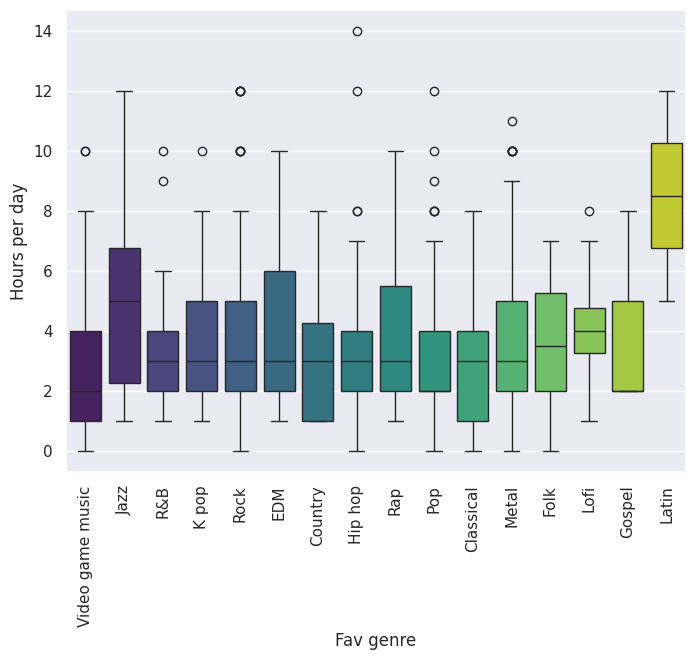

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df['Fav genre'], y=df['Hours per day'], palette = "viridis")
plt.xticks(rotation=90)

# Mental Health Analysis

Favorite genre amd anxiety

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Video game music'),
  Text(1, 0, 'Jazz'),
  Text(2, 0, 'R&B'),
  Text(3, 0, 'K pop'),
  Text(4, 0, 'Rock'),
  Text(5, 0, 'EDM'),
  Text(6, 0, 'Country'),
  Text(7, 0, 'Hip hop'),
  Text(8, 0, 'Rap'),
  Text(9, 0, 'Pop'),
  Text(10, 0, 'Classical'),
  Text(11, 0, 'Metal'),
  Text(12, 0, 'Folk'),
  Text(13, 0, 'Lofi'),
  Text(14, 0, 'Gospel'),
  Text(15, 0, 'Latin')])

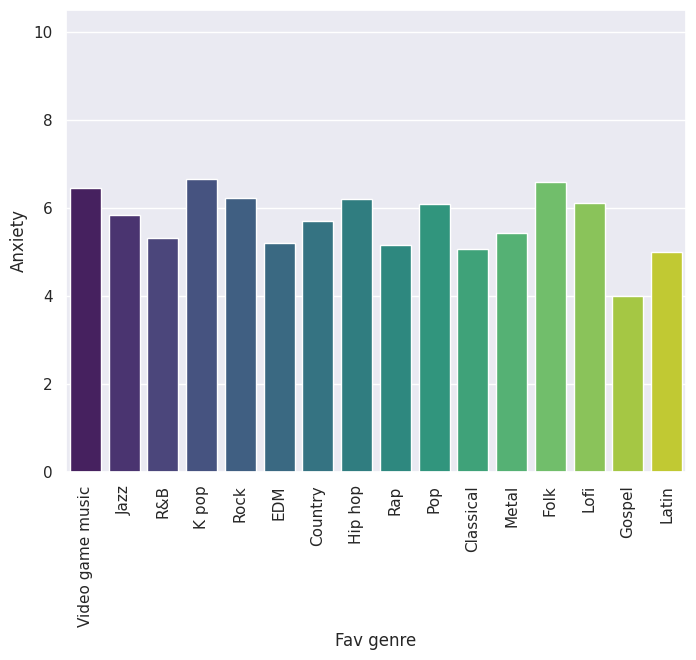

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x=df['Fav genre'], y=df['Anxiety'], errwidth=0, palette = "viridis")
plt.xticks(rotation=90)

Favorite genre amd insomnia

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Video game music'),
  Text(1, 0, 'Jazz'),
  Text(2, 0, 'R&B'),
  Text(3, 0, 'K pop'),
  Text(4, 0, 'Rock'),
  Text(5, 0, 'EDM'),
  Text(6, 0, 'Country'),
  Text(7, 0, 'Hip hop'),
  Text(8, 0, 'Rap'),
  Text(9, 0, 'Pop'),
  Text(10, 0, 'Classical'),
  Text(11, 0, 'Metal'),
  Text(12, 0, 'Folk'),
  Text(13, 0, 'Lofi'),
  Text(14, 0, 'Gospel'),
  Text(15, 0, 'Latin')])

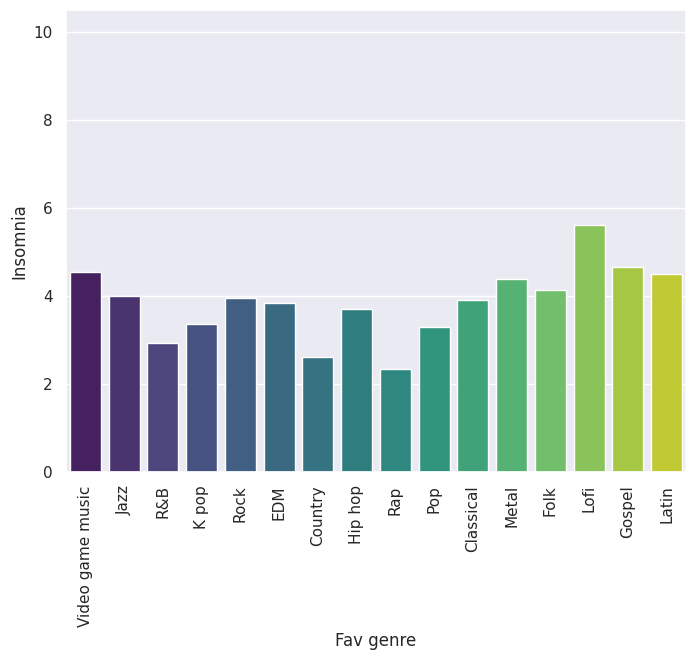

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x=df['Fav genre'], y=df['Insomnia'], errwidth=0, palette = "viridis")
plt.xticks(rotation=90)

Favorite genre and OCD

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Video game music'),
  Text(1, 0, 'Jazz'),
  Text(2, 0, 'R&B'),
  Text(3, 0, 'K pop'),
  Text(4, 0, 'Rock'),
  Text(5, 0, 'EDM'),
  Text(6, 0, 'Country'),
  Text(7, 0, 'Hip hop'),
  Text(8, 0, 'Rap'),
  Text(9, 0, 'Pop'),
  Text(10, 0, 'Classical'),
  Text(11, 0, 'Metal'),
  Text(12, 0, 'Folk'),
  Text(13, 0, 'Lofi'),
  Text(14, 0, 'Gospel'),
  Text(15, 0, 'Latin')])

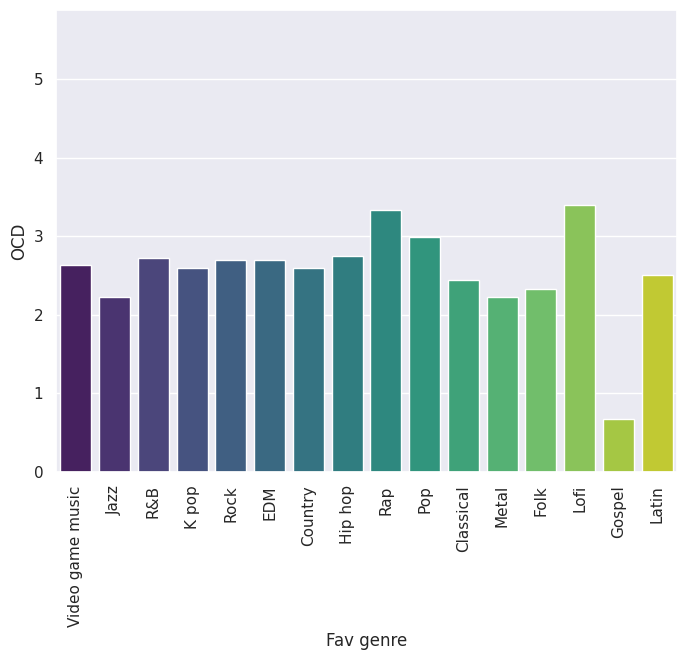

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x=df['Fav genre'], y=df['OCD'], errwidth=0, palette = "viridis")
plt.xticks(rotation=90)

Favorite genre and depression

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Video game music'),
  Text(1, 0, 'Jazz'),
  Text(2, 0, 'R&B'),
  Text(3, 0, 'K pop'),
  Text(4, 0, 'Rock'),
  Text(5, 0, 'EDM'),
  Text(6, 0, 'Country'),
  Text(7, 0, 'Hip hop'),
  Text(8, 0, 'Rap'),
  Text(9, 0, 'Pop'),
  Text(10, 0, 'Classical'),
  Text(11, 0, 'Metal'),
  Text(12, 0, 'Folk'),
  Text(13, 0, 'Lofi'),
  Text(14, 0, 'Gospel'),
  Text(15, 0, 'Latin')])

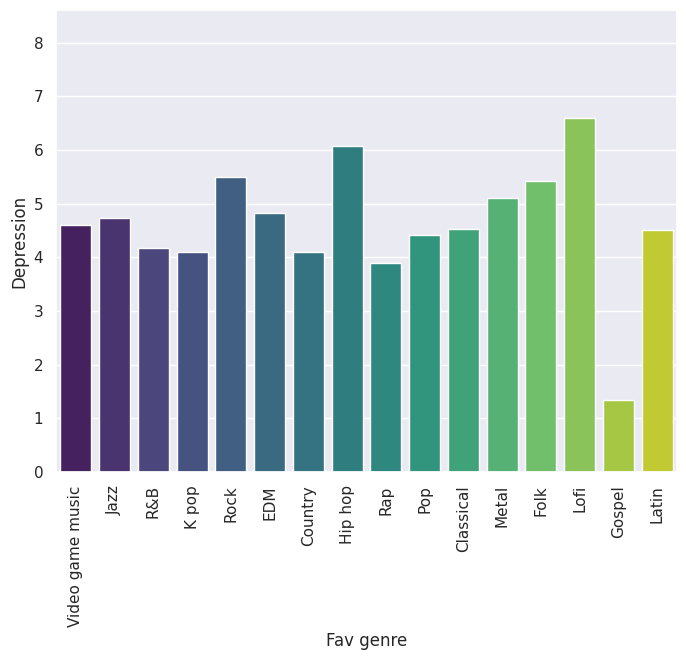

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x=df['Fav genre'], y=df['Depression'], errwidth=0, palette = "viridis")
plt.xticks(rotation=90)

Favorite genre, age and the effect of music

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Video game music'),
  Text(1, 0, 'Jazz'),
  Text(2, 0, 'R&B'),
  Text(3, 0, 'K pop'),
  Text(4, 0, 'Rock'),
  Text(5, 0, 'EDM'),
  Text(6, 0, 'Country'),
  Text(7, 0, 'Hip hop'),
  Text(8, 0, 'Rap'),
  Text(9, 0, 'Pop'),
  Text(10, 0, 'Classical'),
  Text(11, 0, 'Metal'),
  Text(12, 0, 'Folk'),
  Text(13, 0, 'Lofi'),
  Text(14, 0, 'Gospel'),
  Text(15, 0, 'Latin')])

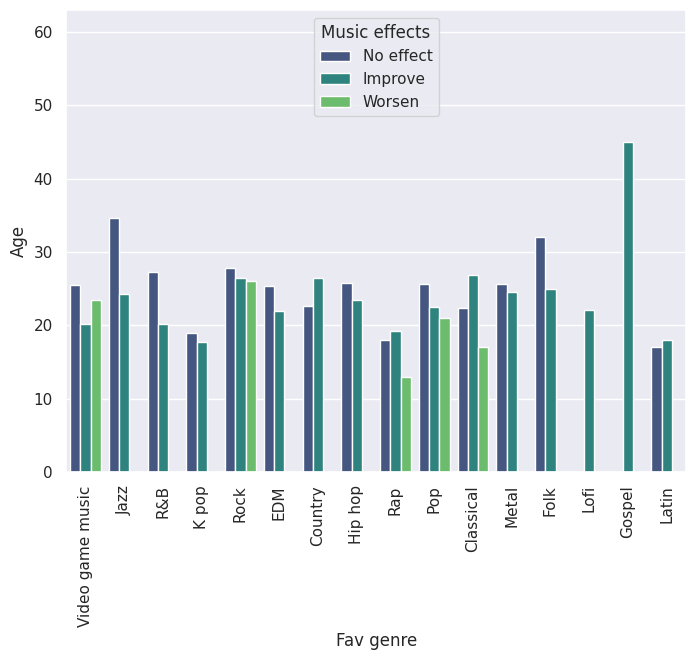

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x=df['Fav genre'], y=df['Age'], hue=df['Music effects'], errwidth=0, palette='viridis')
plt.xticks(rotation=90)

Mental health ranking distribution

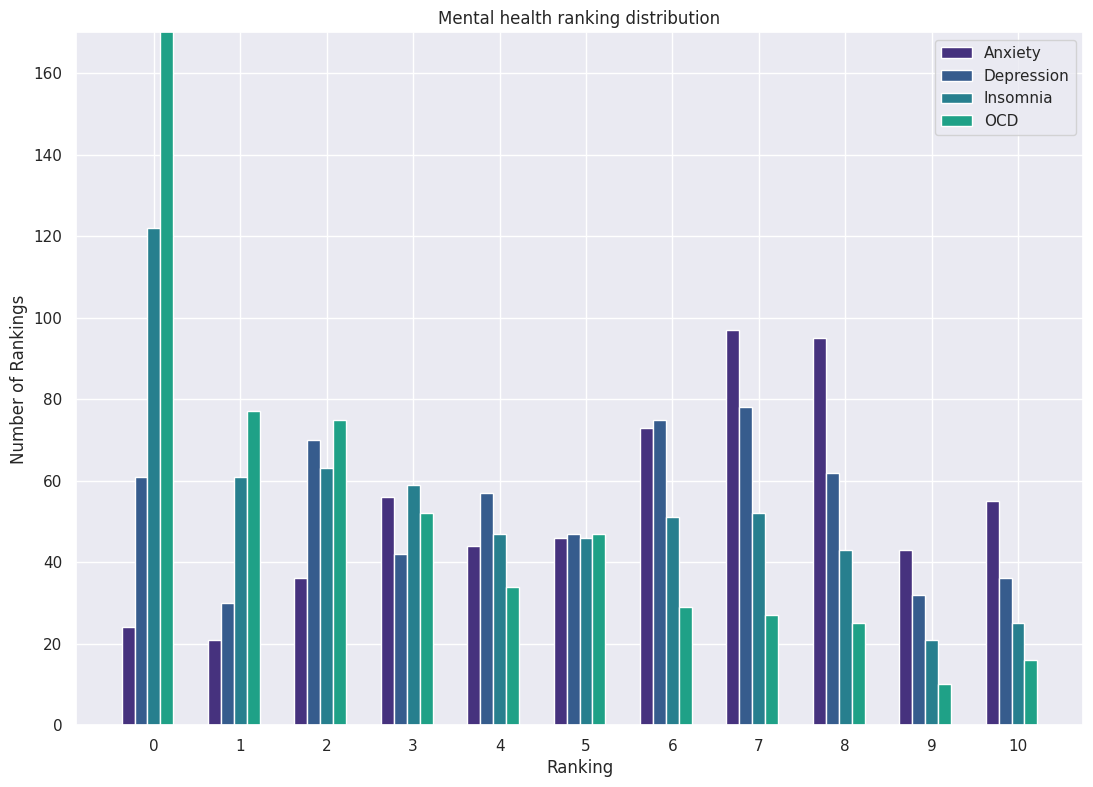

In [ ]:
m_all = ["Anxiety", "Depression", "Insomnia", "OCD"]

mental_df = df[m_all]
mental_df.round(0).astype(int)

disorder_count = []
for disorder in m_all:
    x=0
    while x !=11:
        count =  (mental_df[disorder].values == x).sum()
        disorder_count.append(count)
        x +=1

labels = ['0','1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
x = np.arange(len(labels))
width = 0.15

fig, ax = plt.subplots(figsize=(13, 9))

b1 = ax.bar(x-2*width, disorder_count[0:11], width, label="Anxiety")
b2 = ax.bar(x-width, disorder_count[11:22], width, label="Depression")
b3 = ax.bar(x, disorder_count[22:33], width, label="Insomnia")
b4 = ax.bar(x+width, disorder_count[33:], width, label="OCD")
ax.set_ylim([0, 170])
ax.set_ylabel('Number of Rankings')
ax.set_xlabel('Ranking')
ax.set_title('Mental health ranking distribution')
ax.set_xticks(x, labels)
ax.legend()

plt.show()

In [ ]:
max(disorder_count)

198

Mean of disorder rankings

In [ ]:
for disorder in m_all:
    d_avg = str(round(df[disorder].mean(), 2))
    print(disorder + ' average: ' + d_avg)

Anxiety average: 5.9
Depression average: 4.91
Insomnia average: 3.79
OCD average: 2.66


Effects of music on mental health

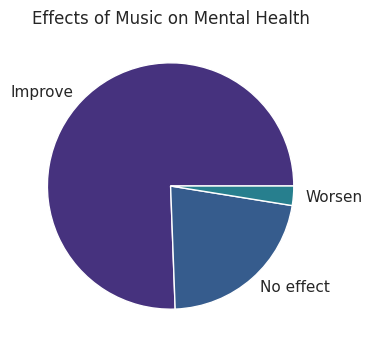

In [ ]:
plt.figure(figsize=(5,4))
plt.title('Effects of Music on Mental Health')

effects = df['Music effects'].value_counts()
effects.plot(kind='pie',ylabel= '');

In [ ]:
effects

Music effects
Improve      446
No effect    129
Worsen        15
Name: count, dtype: int64

Music effects by favorite genre

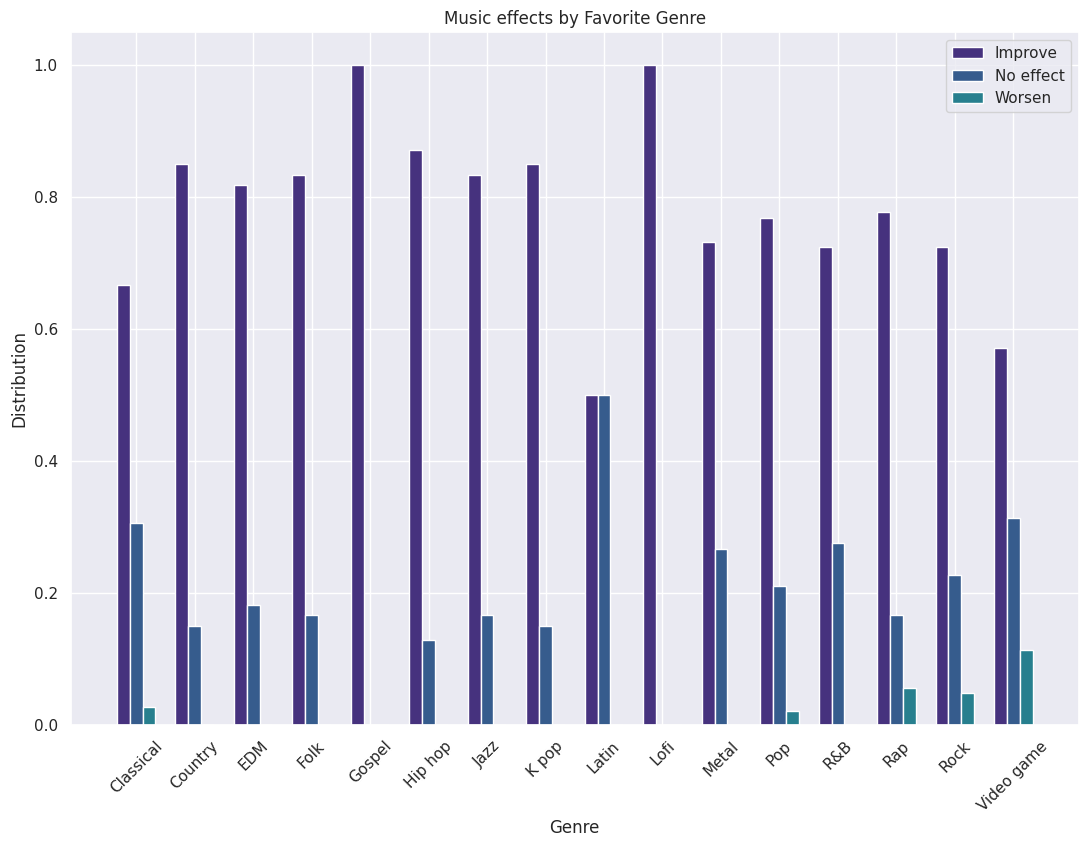

In [ ]:
df.replace(['Video game music'],
                       ['Video game'], inplace=True)

g_all = df['Fav genre'].unique()
g_all.sort()
fg_df = df.groupby(['Fav genre'])
fg_dist = fg_df['Music effects'].value_counts(ascending=False, normalize=True).tolist()

insert_indices = [5, 8, 11, 13, 14, 17, 20, 23, 26, 28, 29, 32, 38]
for i in range(len(insert_indices)):
    fg_dist.insert(insert_indices[i], 0)

imp_dist = fg_dist[0::3]
no_eff_dist = fg_dist[1::3]
wors_dist = fg_dist[2::3]

width = 0.22

x = np.arange(len(g_all))

fig, ax = plt.subplots(figsize=(13, 9))

b1 = ax.bar(x-width, imp_dist, width, label="Improve")
b2 = ax.bar(x, no_eff_dist, width, label="No effect")
b3 = ax.bar(x+width, wors_dist, width, label="Worsen")

plt.title("Music effects by Favorite Genre")
ax.set_ylabel('Distribution')
ax.set_xlabel('Genre')
ax.set_xticks(x, g_all, rotation = 45)
ax.legend()

plt.show()

# Predicting Mental Health From Taste in Music

Re-round al values

In [ ]:
df = df.round()

Split the dataset

Make sure that the outlier BPM values are dropped

In [ ]:
df = df[(df['BPM'].isnull()) | (df['BPM'] >= 20) & (df['BPM'] <= 500)]

Check the null values

In [ ]:
df.isna().sum()

Timestamp                         0
Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                     

In [ ]:
df['Fav genre'].value_counts()

Fav genre
Rock                188
Pop                 114
Metal                86
Classical            53
Video game music     43
EDM                  36
Hip hop              35
R&B                  34
Folk                 29
K pop                26
Country              25
Rap                  22
Jazz                 20
Lofi                 10
Gospel                5
Latin                 3
Name: count, dtype: int64

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

X = df.drop(['Depression', 'Anxiety', 'Insomnia', 'OCD'], axis=1)
y1 = df['Anxiety']
y2 = df['Depression']
y3 = df['Insomnia']
y4 = df['OCD']

y = np.column_stack((y1, y2, y3, y4))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=df['Fav genre'], random_state=42)

In [ ]:
len(X_train['Fav genre'].value_counts())

16

In [ ]:
len(X_test['Fav genre'].value_counts())

16

Make sure that the fave genre set has the correct number of values

Create a transformer

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class Remover(BaseEstimator, TransformerMixin):

    def __init__(self, useless):
        self.useless = useless

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()

        X_copy = X_copy.drop(self.useless, axis=1)

        return X_copy

Create the pipeline

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

Get rid of timestamps and permissions

In [ ]:
useless = ["Timestamp", "Permissions"]

cat_stuff = X_train.columns[X_train.dtypes == 'object']
cat_stuff = cat_stuff.difference(useless)
cat_stuff = cat_stuff.tolist()

num_stuff = X_train.columns.difference(useless).difference(cat_stuff)
num_stuff = num_stuff.tolist()

Create pipelines

In [ ]:
num_pipeline = Pipeline ([
    ("imputer", SimpleImputer(strategy="mean")),
    ("std", StandardScaler())
])

cat_pipeline = Pipeline ([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("one_hot", OneHotEncoder())
])

core_pipeline = ColumnTransformer([
    ("cat", cat_pipeline, cat_stuff),
    ("num", num_pipeline, num_stuff)
])

full_pipeline = Pipeline ([
    ("remover", Remover(useless)),
    ("core_pipeline", core_pipeline)
])

Train and test pipelines

In [ ]:
X_train = full_pipeline.fit_transform(X_train)

In [ ]:
X_test = full_pipeline.fit_transform(X_test)

In [ ]:
X_train.shape, X_test.shape

((619, 102), (110, 102))

In [ ]:
y_train.shape

(619, 4)

# First Model

This model uses multioutput, complete rankings, RFC and adaboost

In [ ]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

multi = MultiOutputClassifier(estimator=AdaBoostClassifier(base_estimator=RandomForestClassifier()))
multi.get_params().keys()

dict_keys(['estimator__algorithm', 'estimator__base_estimator__bootstrap', 'estimator__base_estimator__ccp_alpha', 'estimator__base_estimator__class_weight', 'estimator__base_estimator__criterion', 'estimator__base_estimator__max_depth', 'estimator__base_estimator__max_features', 'estimator__base_estimator__max_leaf_nodes', 'estimator__base_estimator__max_samples', 'estimator__base_estimator__min_impurity_decrease', 'estimator__base_estimator__min_samples_leaf', 'estimator__base_estimator__min_samples_split', 'estimator__base_estimator__min_weight_fraction_leaf', 'estimator__base_estimator__n_estimators', 'estimator__base_estimator__n_jobs', 'estimator__base_estimator__oob_score', 'estimator__base_estimator__random_state', 'estimator__base_estimator__verbose', 'estimator__base_estimator__warm_start', 'estimator__base_estimator', 'estimator__estimator', 'estimator__learning_rate', 'estimator__n_estimators', 'estimator__random_state', 'estimator', 'n_jobs'])

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import warnings

warnings.filterwarnings("ignore")

model = MultiOutputClassifier(AdaBoostClassifier(base_estimator=RandomForestClassifier()))

param_distributions = {
    "estimator__learning_rate": uniform(0.01, 1.0),
    "estimator__n_estimators": [50, 100, 150],
    "estimator__base_estimator__n_estimators": [100, 200, 300, 400],
    "estimator__base_estimator__criterion": ['gini', 'entropy']
}

random_search = RandomizedSearchCV(model, param_distributions, cv=5, scoring="f1_weighted", return_train_score=True, n_iter=20)

random_search.fit(X_train, y_train)

print(random_search.best_params_)

best_model = random_search.best_estimator_

{'estimator__base_estimator__criterion': 'entropy', 'estimator__base_estimator__n_estimators': 100, 'estimator__learning_rate': 0.34489758021583583, 'estimator__n_estimators': 100}


Recreate the model

In [ ]:
best_model = MultiOutputClassifier(
    estimator=AdaBoostClassifier(
        base_estimator=RandomForestClassifier(
            criterion='gini',
            n_estimators=200
        ),
        learning_rate=0.48508192499490754,
        n_estimators=100
    )
)

In [ ]:
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

Test the model

In [ ]:
y_pred[:5]

array([[7., 2., 0., 0.],
       [8., 8., 7., 5.],
       [8., 4., 0., 0.],
       [8., 7., 0., 0.],
       [9., 2., 2., 0.]])

In [ ]:
y_test[:5]

array([[ 4.,  2.,  0.,  0.],
       [ 3.,  2.,  5.,  6.],
       [ 5.,  3.,  5.,  3.],
       [ 5.,  1.,  1.,  9.],
       [ 3., 10.,  4.,  1.]])

Evaluate the model

In [ ]:
base_estimator = best_model.estimators_[0]
feature_importances = base_estimator.feature_importances_

feature_importances

array([0.00779652, 0.00936037, 0.01017877, 0.01011061, 0.00516964,
       0.00243658, 0.0052354 , 0.00294244, 0.0005342 , 0.00359259,
       0.00249861, 0.0029722 , 0.00043184, 0.00164282, 0.00666742,
       0.00804849, 0.00366792, 0.00333346, 0.01102455, 0.00418818,
       0.01150962, 0.0097905 , 0.01195258, 0.01268829, 0.01131105,
       0.00769991, 0.01258524, 0.01137747, 0.00908077, 0.00495139,
       0.0123257 , 0.01216227, 0.01005364, 0.0081932 , 0.01254691,
       0.0119087 , 0.0092367 , 0.00644367, 0.01018343, 0.00802397,
       0.00515648, 0.00217433, 0.01007059, 0.01270402, 0.01101565,
       0.00778395, 0.01154597, 0.01230771, 0.01126483, 0.00498307,
       0.01122084, 0.01104163, 0.00618997, 0.0060372 , 0.01179198,
       0.01078879, 0.00683757, 0.00344153, 0.01190071, 0.01342801,
       0.01098066, 0.00731963, 0.01037627, 0.01117435, 0.01076654,
       0.00966503, 0.00524484, 0.01074646, 0.0129217 , 0.01202853,
       0.01026523, 0.01216229, 0.01139946, 0.00780567, 0.00999

In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

def multi_classification_report(y_test, y_pred):

    avg_precision = 0
    avg_recall = 0
    avg_f1 = 0
    support_list = []

    for i in range(y_test.shape[1]):
        precision = precision_score(y_test[:, i], y_pred[:, i], average='weighted')
        recall = recall_score(y_test[:, i], y_pred[:, i], average='weighted')
        f1 = f1_score(y_test[:, i], y_pred[:, i], average='weighted')

        avg_precision += precision
        avg_recall += recall
        avg_f1 += f1
        support_list.append(precision_score(y_test[:, i], y_pred[:, i], average='weighted', zero_division=1))

    avg_precision /= y_test.shape[1]
    avg_recall /= y_test.shape[1]
    avg_f1 /= y_test.shape[1]

    report = (f"Precision: {avg_precision:.5f}\n"
             f"Recall: {avg_recall:.5f}\n"
             f"F1 score: {avg_f1:.5f}\n"
             f"Support: {support_list}\n")

    return report

In [ ]:
report = multi_classification_report(y_test, y_pred)
print(report)

Precision: 0.17285
Recall: 0.21136
F1 score: 0.15267
Support: [0.33886828147697706, 0.19098726439924263, 0.35093704423918326, 0.3560756075607561]



In [ ]:
from sklearn.metrics import jaccard_score

def jscore(y_test, y_pred):

    scores = [jaccard_score(y_test[:, i], y_pred[:, i], average='weighted') for i in range(y_test.shape[1])]

    avg_score = np.mean(scores)

    print(f"Avg Jaccard similarity coefficient: {avg_score:.5f}")

In [ ]:
jscore(y_test, y_pred)

Avg Jaccard similarity coefficient: 0.09260


Save the model & pipeline

In [ ]:
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

In [ ]:
with open("pipeline.pkl", "wb") as f:
    pickle.dump(full_pipeline, f)

# Second Iteration of the First Model

This iteration also uses, multioutput, adaboost and RFC, but it uses binary classification

Convert values

In [ ]:
y

array([[ 3.,  0.,  1.,  0.],
       [ 7.,  2.,  2.,  1.],
       [ 7.,  7., 10.,  2.],
       ...,
       [ 2.,  2.,  2.,  2.],
       [ 2.,  3.,  2.,  1.],
       [ 2.,  2.,  2.,  5.]])

Convert to binary

In [ ]:
mask = y > 4
y_b = np.where(mask, 1, 0)
y_b

array([[0, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 1, 1, 0],
       ...,
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 1]])

In [ ]:
x_X_train, x_X_test, y_b_train, y_b_test = train_test_split(X, y_b, test_size=0.15, stratify=df['Fav genre'], random_state=42)

Build the model

In [ ]:
model = MultiOutputClassifier(AdaBoostClassifier(base_estimator=RandomForestClassifier()))

param_distributions = {
    "estimator__learning_rate": uniform(0.01, 1.0),
    "estimator__n_estimators": [50, 100, 150],
    "estimator__base_estimator__n_estimators": [100, 200, 300, 400],
    "estimator__base_estimator__criterion": ['gini', 'entropy']
}

random_search = RandomizedSearchCV(model, param_distributions, cv=3, scoring="f1_weighted", return_train_score=True, n_iter=20)

random_search.fit(X_train, y_b_train)

print(random_search.best_params_)

best_model = random_search.best_estimator_

{'estimator__base_estimator__criterion': 'gini', 'estimator__base_estimator__n_estimators': 100, 'estimator__learning_rate': 0.3334466825955742, 'estimator__n_estimators': 50}


In [ ]:
best_model.fit(X_train, y_b_train)

y_pred = best_model.predict(X_test)

Train

In [ ]:
y_pred[:5]

array([[1, 0, 0, 0],
       [1, 1, 1, 1],
       [1, 0, 0, 0],
       [1, 1, 0, 0],
       [1, 0, 0, 0]])

In [ ]:
y_b_test[:5]

array([[0, 0, 0, 0],
       [0, 0, 1, 1],
       [1, 0, 1, 0],
       [1, 0, 0, 1],
       [0, 1, 0, 0]])

Evaluate the model

In [ ]:
base_estimator = best_model.estimators_[0]
feature_importances = base_estimator.feature_importances_

feature_importances

array([0.00688476, 0.0080585 , 0.00907629, 0.00986237, 0.00484572,
       0.00330738, 0.00710212, 0.00314873, 0.00188498, 0.00463668,
       0.00187549, 0.00396713, 0.00076122, 0.00140256, 0.00675988,
       0.0074977 , 0.00420565, 0.00638789, 0.00992986, 0.00504224,
       0.01066267, 0.00909288, 0.01135952, 0.01099576, 0.01159726,
       0.01032825, 0.0098947 , 0.01149731, 0.0091436 , 0.00484556,
       0.00993711, 0.00940607, 0.00769978, 0.00814044, 0.01552448,
       0.00998207, 0.00927129, 0.00579632, 0.00798798, 0.00892196,
       0.0041818 , 0.0020262 , 0.00718164, 0.01171212, 0.01008807,
       0.00747324, 0.01001787, 0.01236068, 0.00912089, 0.0060526 ,
       0.01052818, 0.00853845, 0.00757371, 0.00581736, 0.00839349,
       0.00826678, 0.00688574, 0.00337425, 0.00926799, 0.01103971,
       0.00919967, 0.00587752, 0.01525812, 0.00917195, 0.01063178,
       0.00761668, 0.00841363, 0.01002426, 0.01059357, 0.01025104,
       0.00987498, 0.01063338, 0.00901852, 0.00698328, 0.01184

In [ ]:
report = multi_classification_report(y_test, y_pred)
print(report)

Precision: 0.06538
Recall: 0.18182
F1 score: 0.09226
Support: [0.9044289044289044, 0.812086432634378, 0.657132999827497, 0.5969696969696969]



In [ ]:
jscore(y_test, y_pred)

Avg Jaccard similarity coefficient: 0.05839


Save the model

In [ ]:
with open('modelb.pkl', 'wb') as f:
    pickle.dump(best_model, f)

# Model 2

This model uses complete ranking with lazypredict and xgboost

In [ ]:
!pip install lazypredict

Clean the data

Split the set

Create the pipelines

In [ ]:
def clean(y2):
    # separate labels and features
    X = df.drop(['Depression', 'Anxiety', 'Insomnia', 'OCD'], axis=1)

    # split train and test
    X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y2, test_size=0.15, stratify=df['Fav genre'], random_state=42)

    # pipeline
    X_train2 = full_pipeline.fit_transform(X_train2)
    X_test2 = full_pipeline.fit_transform(X_test2)

    X_train2 = X_train2.toarray()
    X_test2 = X_test2.toarray()

    return X_train2, X_test2, y_train2, y_test2

In [ ]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)

def lazy_predict(X_train2, X_test2, y_train2, y_test2):

    models, predictions = clf.fit(X_train2, X_test2, y_train2, y_test2)

    results_df = pd.DataFrame(models)
    results_df = results_df[["F1 Score", "Balanced Accuracy", "Time Taken"]]
    results_df = results_df.sort_values(by='F1 Score', ascending=False)
    print(results_df[:5])

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

xgb_model = XGBClassifier()

def xg(X_train2, X_test2, y_train2, y_test2):

    xgb_model.fit(X_train2, y_train2)
    print(classification_report(y_test2, xgb_model.predict(X_test2)))

    f1 = f1_score(y_test2, xgb_model.predict(X_test2), average='weighted')
    print(f"F1 score: {f1:.2f}")

Model for anxiety

In [ ]:
import warnings
warnings.simplefilter("ignore", category=Warning)

lazy_predict(*clean(df['Anxiety']))

'tuple' object has no attribute '__name__'
Invalid Classifier(s)


 93%|█████████▎| 27/29 [00:07<00:00,  7.48it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000690 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 421
[LightGBM] [Info] Number of data points in the train set: 619, number of used features: 94
[LightGBM] [Info] Start training from score -3.132268
[LightGBM] [Info] Start training from score -3.209229
[LightGBM] [Info] Start training from score -2.931598
[LightGBM] [Info] Start training from score -2.457813
[LightGBM] [Info] Start training from score -2.599464
[LightGBM] [Info] Start training from score -2.476862
[LightGBM] [Info] Start training from score -2.238451
[LightGBM] [Info] Start training from score -1.774145
[LightGBM] [Info] Start training from score -1.783714
[LightGBM] [Info] Start training from score -2.496280
[LightGBM] [Info] Start training from score -2.385054
[LightGBM] [Warning] No further splits with positive gai

100%|██████████| 29/29 [00:10<00:00,  2.88it/s]

                        F1 Score  Balanced Accuracy  Time Taken
Model                                                          
LinearSVC                   0.13               0.12        1.30
LogisticRegression          0.13               0.12        0.12
LGBMClassifier              0.12               0.13        1.70
AdaBoostClassifier          0.12               0.13        0.18
DecisionTreeClassifier      0.12               0.11        0.03


In [ ]:
xg(*clean(df['Anxiety']))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         8
         1.0       0.17      0.25      0.20         4
         2.0       0.25      0.09      0.13        11
         3.0       0.08      0.06      0.07        16
         4.0       0.00      0.00      0.00         8
         5.0       0.00      0.00      0.00         6
         6.0       0.08      0.06      0.07        17
         7.0       0.17      0.24      0.20        17
         8.0       0.21      0.50      0.29        10
         9.0       0.00      0.00      0.00         5
        10.0       0.12      0.12      0.12         8

    accuracy                           0.13       110
   macro avg       0.10      0.12      0.10       110
weighted avg       0.11      0.13      0.11       110

F1 score: 0.11


Depression Model

In [ ]:
warnings.filterwarnings("ignore", category=UserWarning)

lazy_predict(*clean(df['Depression']))

'tuple' object has no attribute '__name__'
Invalid Classifier(s)


 97%|█████████▋| 28/29 [00:10<00:00,  4.77it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000708 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 421
[LightGBM] [Info] Number of data points in the train set: 619, number of used features: 94
[LightGBM] [Info] Start training from score -2.269222
[LightGBM] [Info] Start training from score -2.931598
[LightGBM] [Info] Start training from score -2.110617
[LightGBM] [Info] Start training from score -2.599464
[LightGBM] [Info] Start training from score -2.496280
[LightGBM] [Info] Start training from score -2.536285
[LightGBM] [Info] Start training from score -2.033656
[LightGBM] [Info] Start training from score -1.997288
[LightGBM] [Info] Start training from score -2.238451
[LightGBM] [Info] Start training from score -2.931598
[LightGBM] [Info] Start training from score -2.817187
[LightGBM] [Warning] No further splits with positive gai

100%|██████████| 29/29 [00:12<00:00,  2.41it/s]

                        F1 Score  Balanced Accuracy  Time Taken
Model                                                          
DecisionTreeClassifier      0.16               0.14        0.04
NuSVC                       0.16               0.11        0.13
BaggingClassifier           0.15               0.12        0.11
ExtraTreeClassifier         0.14               0.15        0.03
SVC                         0.14               0.11        0.09


In [ ]:
xg(*clean(df['Depression']))

              precision    recall  f1-score   support

         0.0       0.45      0.25      0.32        20
         1.0       0.00      0.00      0.00         7
         2.0       0.12      0.12      0.12        17
         3.0       0.12      0.08      0.10        13
         4.0       0.08      0.12      0.10         8
         5.0       0.00      0.00      0.00         7
         6.0       0.05      0.14      0.07         7
         7.0       0.17      0.18      0.17        11
         8.0       0.00      0.00      0.00         9
         9.0       0.00      0.00      0.00         5
        10.0       0.25      0.17      0.20         6

    accuracy                           0.12       110
   macro avg       0.11      0.10      0.10       110
weighted avg       0.15      0.12      0.13       110

F1 score: 0.13


Insomnia Model

In [ ]:
warnings.filterwarnings("ignore", category=UserWarning)

lazy_predict(*clean(df['Insomnia']))

'tuple' object has no attribute '__name__'
Invalid Classifier(s)


 97%|█████████▋| 28/29 [00:09<00:00,  5.37it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000708 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 421
[LightGBM] [Info] Number of data points in the train set: 619, number of used features: 94
[LightGBM] [Info] Start training from score -1.640614
[LightGBM] [Info] Start training from score -2.284971
[LightGBM] [Info] Start training from score -2.151439
[LightGBM] [Info] Start training from score -2.350568
[LightGBM] [Info] Start training from score -2.420772
[LightGBM] [Info] Start training from score -2.556904
[LightGBM] [Info] Start training from score -2.385054
[LightGBM] [Info] Start training from score -2.439121
[LightGBM] [Info] Start training from score -2.739226
[LightGBM] [Info] Start training from score -3.209229
[LightGBM] [Info] Start training from score -3.170009
[LightGBM] [Warning] No further splits with positive gai

100%|██████████| 29/29 [00:10<00:00,  2.84it/s]

                            F1 Score  Balanced Accuracy  Time Taken
Model                                                              
RandomForestClassifier          0.18               0.10        0.33
KNeighborsClassifier            0.16               0.12        0.03
DecisionTreeClassifier          0.15               0.12        0.03
LinearDiscriminantAnalysis      0.15               0.13        0.05
SGDClassifier                   0.14               0.15        0.18


In [ ]:
xg(*clean(df['Insomnia']))

              precision    recall  f1-score   support

         0.0       0.22      0.29      0.25        28
         1.0       0.00      0.00      0.00        18
         2.0       0.29      0.33      0.31        15
         3.0       0.00      0.00      0.00         9
         4.0       0.00      0.00      0.00         5
         5.0       0.00      0.00      0.00         9
         6.0       0.00      0.00      0.00         5
         7.0       0.00      0.00      0.00         5
         8.0       1.00      0.12      0.22         8
         9.0       1.00      0.50      0.67         2
        10.0       0.00      0.00      0.00         6

    accuracy                           0.14       110
   macro avg       0.23      0.11      0.13       110
weighted avg       0.19      0.14      0.13       110

F1 score: 0.13


OCD Model

In [ ]:
warnings.filterwarnings("ignore", category=UserWarning)

lazy_predict(*clean(df['OCD']))

'tuple' object has no attribute '__name__'
Invalid Classifier(s)


 93%|█████████▎| 27/29 [00:08<00:00,  6.40it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000823 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 421
[LightGBM] [Info] Number of data points in the train set: 619, number of used features: 94
[LightGBM] [Info] Start training from score -1.085771
[LightGBM] [Info] Start training from score -2.110617
[LightGBM] [Info] Start training from score -2.046079
[LightGBM] [Info] Start training from score -2.420772
[LightGBM] [Info] Start training from score -2.690436
[LightGBM] [Info] Start training from score -2.516082
[LightGBM] [Info] Start training from score -3.132268
[LightGBM] [Info] Start training from score -2.994118
[LightGBM] [Info] Start training from score -3.337063
[LightGBM] [Info] Start training from score -4.030210
[LightGBM] [Info] Start training from score -3.594892
[LightGBM] [Warning] No further splits with positive gai

100%|██████████| 29/29 [00:10<00:00,  2.81it/s]

                      F1 Score  Balanced Accuracy  Time Taken
Model                                                        
RidgeClassifier           0.25               0.13        0.03
RidgeClassifierCV         0.23               0.11        0.04
KNeighborsClassifier      0.23               0.13        0.07
Perceptron                0.22               0.11        0.07
LinearSVC                 0.21               0.13        1.63


In [ ]:
xg(*clean(df['OCD']))

              precision    recall  f1-score   support

         0.0       0.34      0.63      0.44        38
         1.0       0.08      0.05      0.06        19
         2.0       0.17      0.07      0.10        15
         3.0       0.00      0.00      0.00         8
         4.0       0.00      0.00      0.00         5
         5.0       0.00      0.00      0.00         4
         6.0       0.00      0.00      0.00         7
         7.0       0.00      0.00      0.00         3
         8.0       0.50      0.17      0.25         6
         9.0       0.00      0.00      0.00         2
        10.0       0.00      0.00      0.00         3

    accuracy                           0.25       110
   macro avg       0.10      0.08      0.08       110
weighted avg       0.18      0.25      0.19       110

F1 score: 0.19


# Conclusion

Model 1:
Over all was the poorest preforming model of the three. The first iteration of the model had a precision score of 0.17285, a recall score of 0.21136, and a F1 score of 0.15267. The average Jaccard similarity coefficient was 0.09260. The precision score tells the percision percentage which means the number of true positives divided by the total number of positive predictions. Recall refers to the fraction of positives that are correctly classified. The F! score is the the harmonic mean of the precision and recall of a classification model.The average Jaccard similarity coefficient is the measure of similarity for the two sets of data.


 For the second iteration of the model the precision score was 0.06538, the recall score was 0.18182, the
F1 score was 0.09226, and the average Jaccard similarity coefficient was 0.05839. One point to not was that chaning the classification to binary in the second iterration did not bring a significant change in preformance. Thus this type of model may of not been ideal for this task.


Model 2:
With this model all of the nental health conditions were evaluated with their own models using Lay predict. These models were also comapred using xgbiist. Neither lazy predict or xg boost was the best model for all of the data, some of the models scored better with lazy predict and other scored higher with xg boost. Similar to Model 1 though, this model also did not have good Jaccard or F1 scores.


Overall with the data present and the dataset evaluated the conclusion can be made that mental health rankings cannot be predicted from mustic taste alone.